22651
(1000, 1000)


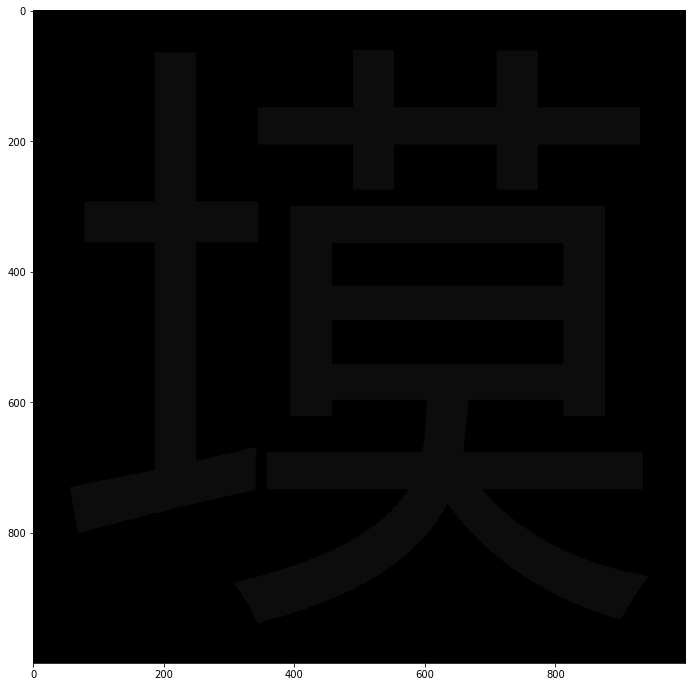

In [143]:
import matplotlib.pyplot as plt
import numpy as np

import FormalImage as fi
#东湭
character = chr(ord('\u4E00') +  np.random.randint(10000)) # 瓿 "\u68D1" # '湭'
print(ord(character))

charImg = fi.renderChar(character, show=True, fontsize=1000)
print(np.shape(charImg))

## Part one:  Determine each pixel's distance from the border

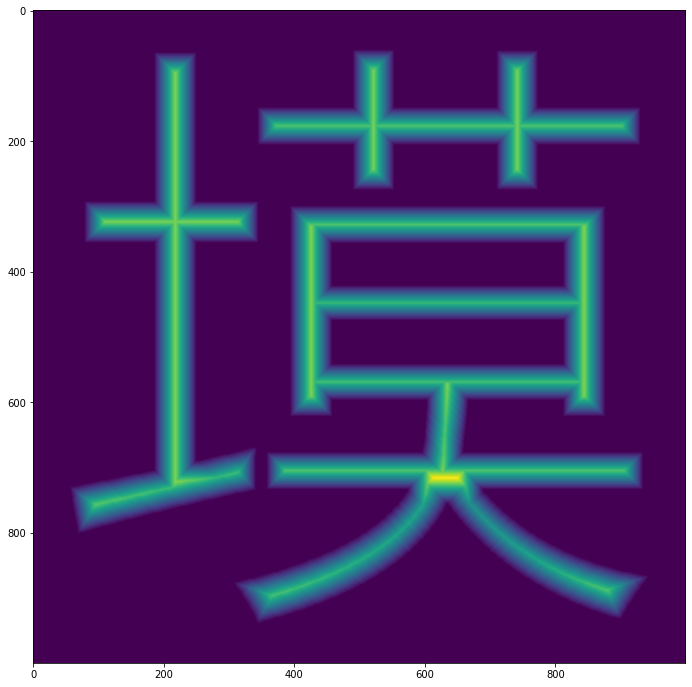

In [144]:
distImg = charImg.copy()
distImg[distImg >= 1] = -1

currBorderDist = 0
while(np.min(distImg) == -1):
    #if pixel borders (diagonal counts too), note these next lines could cause border effects if a "road" is touching the border
    tempImg = distImg.copy()
    borderMask  = tempImg[1:-1, 1:-1] == currBorderDist
    #neighbor is on border and is not already set
    tempImg[0:-2,0:-2][borderMask & (tempImg[0:-2,0:-2] == -1)] = currBorderDist + 1 #top left
    tempImg[0:-2,1:-1][borderMask & (tempImg[0:-2,1:-1] == -1)] = currBorderDist + 1 #top
    tempImg[1:-1,0:-2][borderMask & (tempImg[1:-1,0:-2] == -1)] = currBorderDist + 1 #left
    tempImg[1:-1,2:][  borderMask & (tempImg[1:-1,2:] == -1)]   = currBorderDist + 1 #top
    tempImg[2:,1:-1][  borderMask & (tempImg[2:,1:-1] == -1)]   = currBorderDist + 1 #bottom
    tempImg[0:-2,0:-2][borderMask & (tempImg[0:-2,0:-2] == -1)] = currBorderDist + 1 #top left
    tempImg[0:-2,2:][  borderMask & (tempImg[0:-2,2:] == -1)]   = currBorderDist + 1 #top right
    tempImg[2:,0:-2][  borderMask & (tempImg[2:,0:-2] == -1)]   = currBorderDist + 1 #bottom left
    tempImg[2:,2:][    borderMask & (tempImg[2:,2:] == -1)]     = currBorderDist + 1 #bottom right
    currBorderDist += 1
    
    distImg = tempImg.copy()
    
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(distImg)

0.0 -1.0


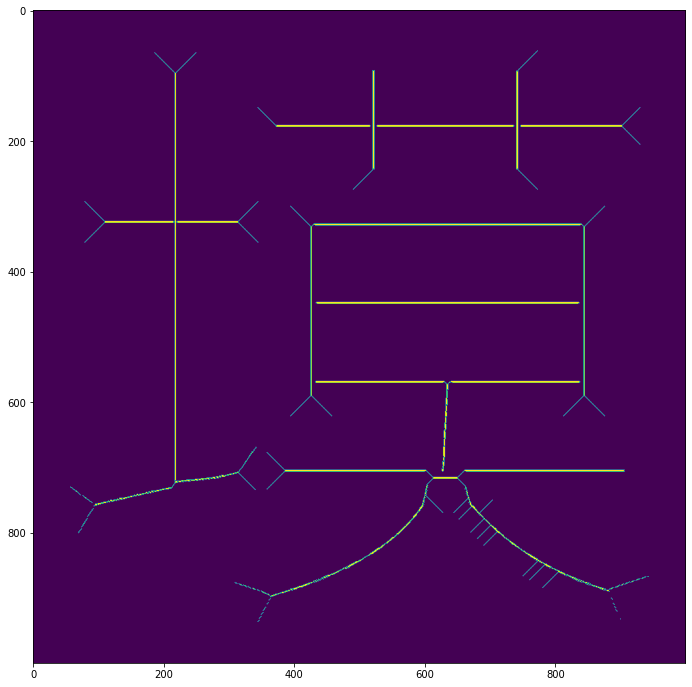

In [145]:
peakImg = np.zeros(np.shape(distImg)) #zero indicates local max, -1 is all other

borderDiff = 1 #distance to check one each size, at least one
totalPad = borderDiff+1
#set all non global maximums to -1
for xDiff in range(-borderDiff,1+borderDiff):
    for yDiff in range(-borderDiff,1+borderDiff):
        if(xDiff == 0 and yDiff == 0): #we don't count the center
            continue
        if(xDiff != 0 and yDiff != 0):
            continue
        mask = distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff] < distImg[totalPad-yDiff:-totalPad-yDiff, totalPad-xDiff:-totalPad-xDiff]
        peakImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff][mask] = -1 #not a local mox
peakImg[distImg == 0] = -1

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(peakImg)

print(np.max(peakImg), np.min(peakImg))

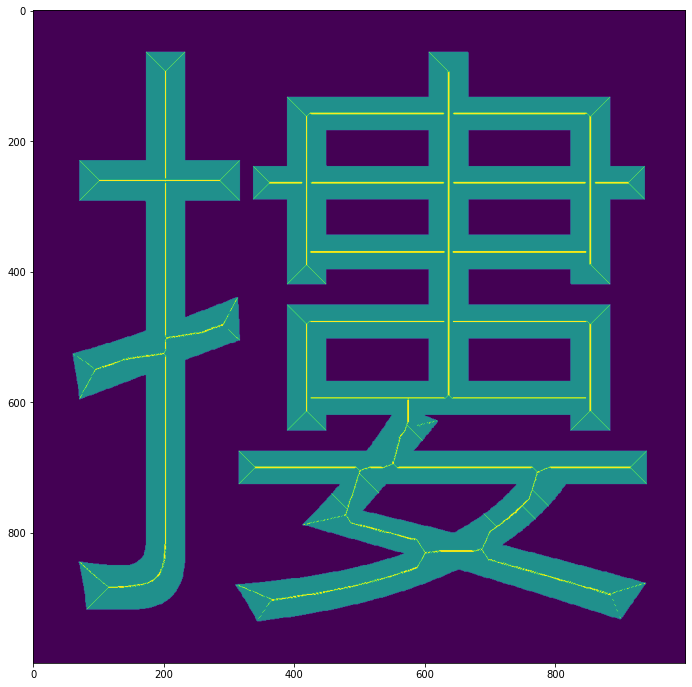

In [137]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(peakImg+charImg)

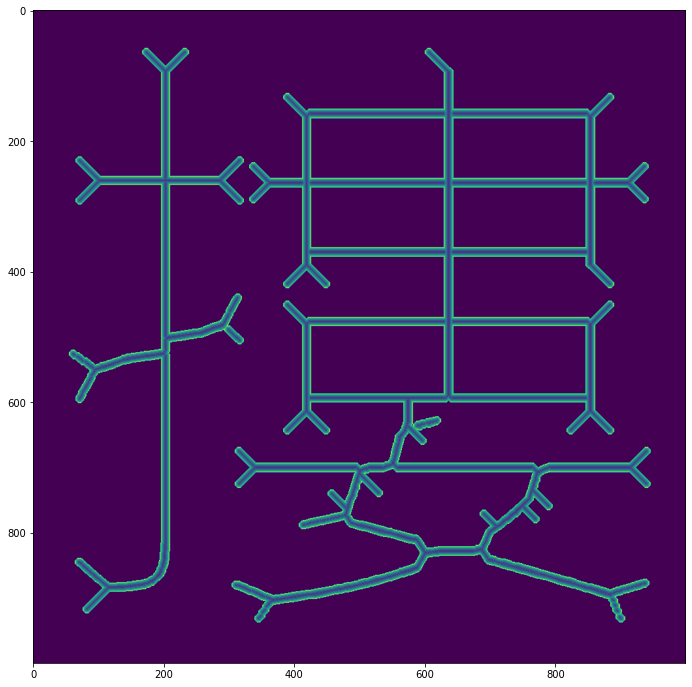

In [142]:
#now invert it so the tall points are 1, it's neighbors are 2, and so on until a certain point.
costImg = np.ones(np.shape(peakImg))
costImg[peakImg == -1] = 1000 #arbitrary high cost

spreadDist = 2
for d in range(1,spreadDist+1):
    costImg[:-1,:][costImg[1:,:]+1 < costImg[:-1,:]] = 1+costImg[1:,:][costImg[1:,:]+1 < costImg[:-1,:]] #left/right
    costImg[1:,:][costImg[:-1,:]+1 < costImg[1:,:]] = 1+costImg[:-1,:][costImg[:-1,:]+1 < costImg[1:,:]] #left/right
    costImg[:,:-1][costImg[:,1:]+1 < costImg[:,:-1]] = 1+costImg[:,1:][costImg[:,1:]+1 < costImg[:,:-1]] #up/1own
    costImg[:,1:][costImg[:,:-1]+1 < costImg[:,1:]] = 1+costImg[:,:-1][costImg[:,:-1]+1 < costImg[:,1:]] #up/1own
    costImg[1:,1:][costImg[:-1,:-1]+1.414 < costImg[1:,1:]] = 1.414+costImg[:-1,:-1][costImg[:-1,:-1]+1.414 < costImg[1:,1:]]
    costImg[1:,:-1][costImg[:-1,1:]+1.414 < costImg[1:,:-1]] = 1.414+costImg[:-1,1:][costImg[:-1,1:]+1.414 < costImg[1:,:-1]]
    costImg[:-1,1:][costImg[1:,:-1]+1.414 < costImg[:-1,1:]] = 1.414+costImg[1:,:-1][costImg[1:,:-1]+1.414 < costImg[:-1,1:]]
    costImg[:-1,:-1][costImg[1:,1:]+1.414 < costImg[:-1,:-1]] = 1.414+costImg[1:,1:][costImg[1:,1:]+1.414 < costImg[:-1,:-1]]

costImg[costImg==1000] = -1
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(costImg)

34.0 -1000.0
1000.0 1.0
5.0 -1.0


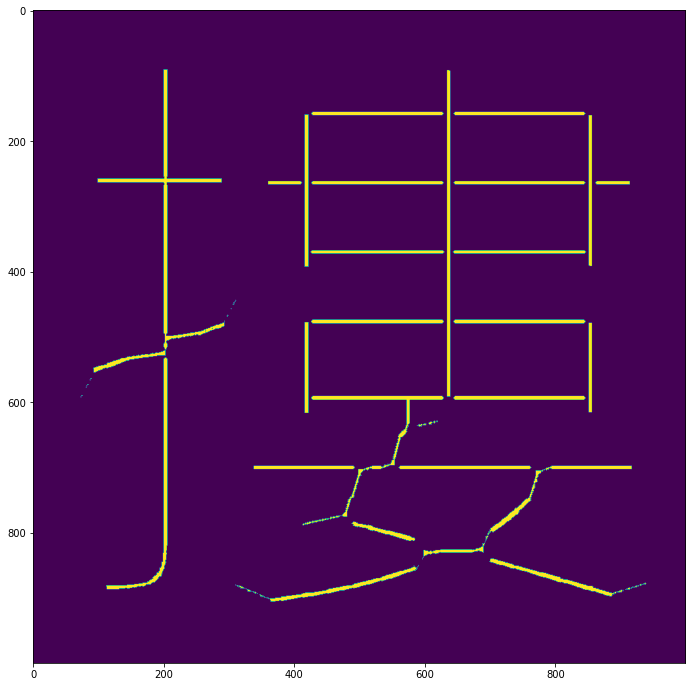

In [60]:
#somewhat complicated use of masks to achieve fast calculation of the distImg
minImg = np.ones(np.shape(distImg))*1000
maxImg = np.ones(np.shape(distImg))*1000*-1

borderDiff = 5
totalPad = borderDiff+1
for xDiff in range(-borderDiff,1+borderDiff):
    for yDiff in range(-borderDiff,1+borderDiff):
        if(xDiff == 0 and yDiff == 0): #we don't count the center
            continue
        nonZeroMask = (distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff] > 0)
        minMask = distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff] < minImg[totalPad:-totalPad, totalPad:-totalPad]
        maxMask  = distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff] > maxImg[totalPad:-totalPad, totalPad:-totalPad]
        
        minImg[totalPad:-totalPad, totalPad:-totalPad][nonZeroMask & minMask] = distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff][nonZeroMask & minMask]
        maxImg[totalPad:-totalPad, totalPad:-totalPad][nonZeroMask & maxMask] = distImg[totalPad+yDiff:-totalPad+yDiff, totalPad+xDiff:-totalPad+xDiff][nonZeroMask & maxMask]

diffImg = maxImg - distImg
diffImg[distImg == 0] = 0

tempImg = np.zeros(np.shape(diffImg))
tempImg[(diffImg >= 0) & (diffImg <= 2)] = 1 #general derivative of nearby pixels is not too high (2), meaning we must be near a local max
tempImg[distImg == 0] = 0

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(tempImg)
print(np.max(maxImg), np.min(maxImg))
print(np.max(minImg), np.min(minImg))
print(np.max(diffImg), np.min(diffImg))
plt.imsave("testImageDiff.png", tempImg, cmap="gray")

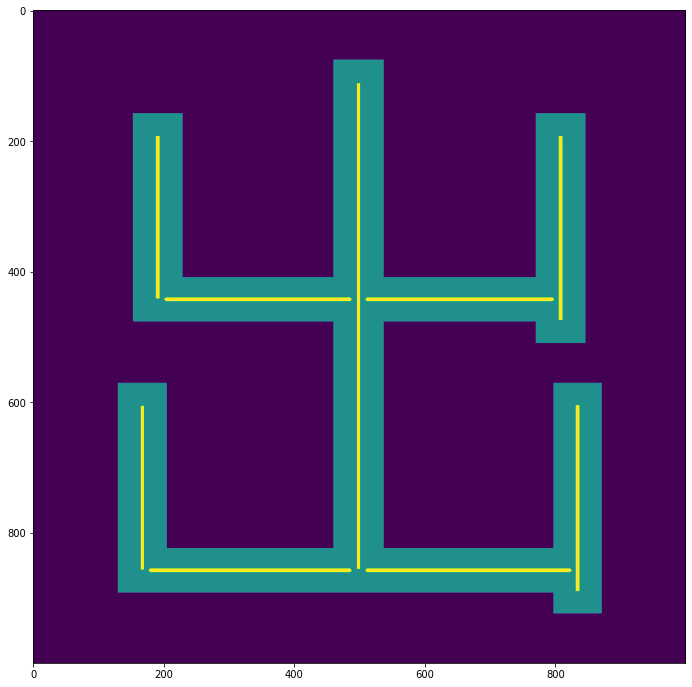

In [4]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(charImg + tempImg)

出


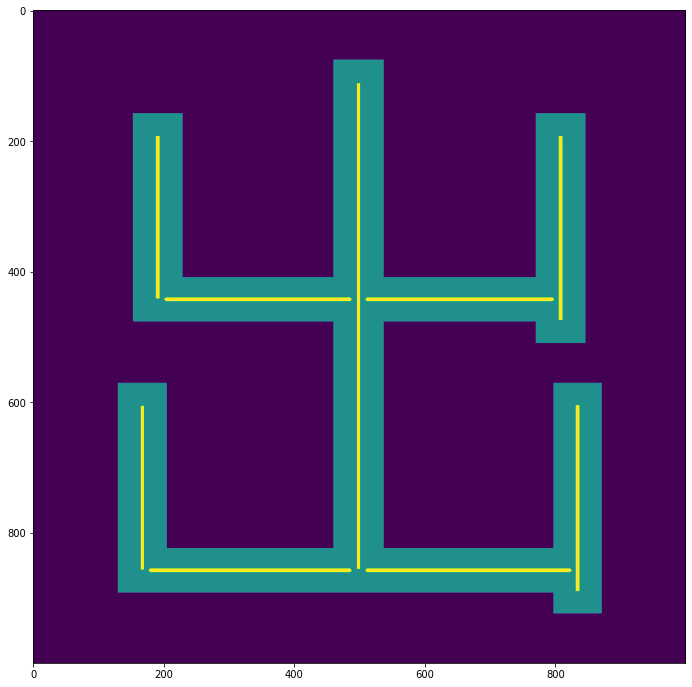

In [5]:
#we may have small artifacts, remove if height is too shallow
tempImg[distImg < np.max(distImg)*.333] = 0

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(charImg + tempImg)
print(character)

## New idea, determine for every "high" pixel, if it is a vertice
Use search algorithm, this is potentially very expensive
A* is probably easiest and most efficient
Thanks to: https://www.analytics-link.com/post/2018/09/14/applying-the-a-path-finding-algorithm-in-python-part-1-2d-square-grid

In [ ]:
#create cost image, outside the character is a -1 (impassible)
#Middle line coords are the road "1"
#Other coords closer to the edge are more expensive (essentially a dirt road), maybe 5?

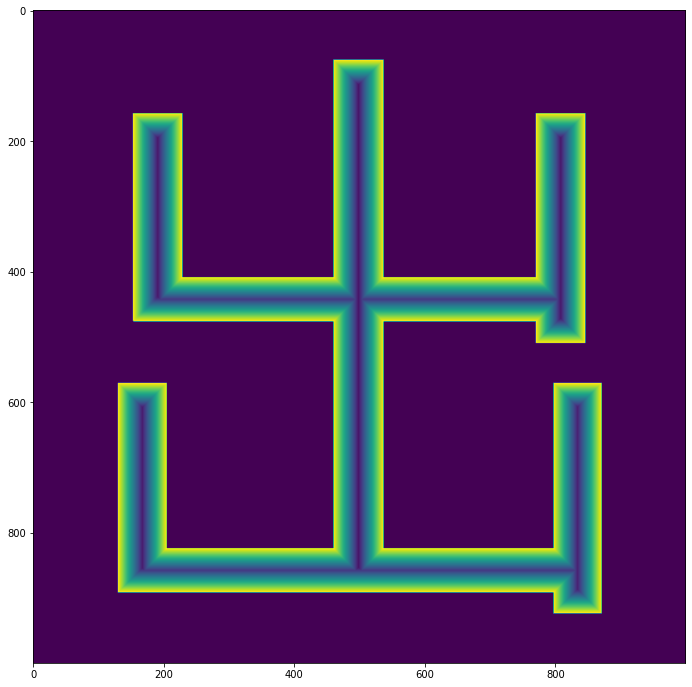

In [7]:
costImg = -1*np.ones(np.shape(distImg))
maxDist = np.max(distImg)
costImg[distImg != 0] = 1 + (maxDist - distImg[distImg != 0]) #between 1 and k*maxDist costs, low cost near the center lines

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(costImg)

In [90]:
coords = np.array(np.where(tempImg == 1)).transpose()
print(coords)

rootCoord = coords[534]

[[119 496]
 [119 497]
 [119 498]
 ...
 [880 166]
 [880 167]
 [880 168]]


In [25]:
import heapq

def heuristic(p1, p2):
    return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1]) #manhattan distance
    #return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def astar(array, start, goal): #array is the cost of travel, -1 indicates blocked route
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    frontier = []
    heapq.heappush(frontier, (fscore[start], start))

    while frontier: #keep exploring until we run out of nodes to find
        current = heapq.heappop(frontier)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data, came_from
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            if(array[neighbor[0],neighbor[1]] == -1): #not valid, out of character region
                continue
            
            tentative_g_score = gscore[current] + array[neighbor[0],neighbor[1]] #previous + travel cost
            if ( (neighbor in close_set) and (tentative_g_score >= gscore.get(neighbor, 0)) ): #already explored / cheaper before
                continue  
                
            if (tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in frontier]):
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(frontier, (fscore[neighbor], neighbor))
    return False #no route found

coords = np.array(np.where(tempImg == 1)).transpose()
startCoord = coords[0]
endCoord = coords[-1]
route, exploredDict = astar(costImg, tuple(startCoord), tuple(endCoord))
route = route + [tuple(startCoord)]
route = route[::-1] #reverse
print(route)

[(112, 496), (113, 497), (114, 498), (115, 498), (116, 498), (117, 498), (118, 498), (119, 498), (120, 498), (121, 498), (122, 498), (123, 498), (124, 498), (125, 498), (126, 498), (127, 498), (128, 498), (129, 498), (130, 498), (131, 498), (132, 498), (133, 498), (134, 498), (135, 498), (136, 498), (137, 498), (138, 498), (139, 498), (140, 498), (141, 498), (142, 498), (143, 498), (144, 498), (145, 498), (146, 498), (147, 498), (148, 498), (149, 498), (150, 498), (151, 498), (152, 498), (153, 498), (154, 498), (155, 498), (156, 498), (157, 498), (158, 498), (159, 498), (160, 498), (161, 498), (162, 498), (163, 498), (164, 498), (165, 498), (166, 498), (167, 498), (168, 498), (169, 498), (170, 498), (171, 498), (172, 498), (173, 498), (174, 498), (175, 498), (176, 498), (177, 498), (178, 498), (179, 498), (180, 498), (181, 498), (182, 498), (183, 498), (184, 498), (185, 498), (186, 498), (187, 498), (188, 498), (189, 498), (190, 498), (191, 498), (192, 498), (193, 498), (194, 498), (19

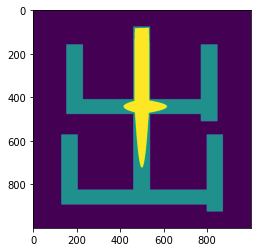

In [24]:
coveredPixels = charImg.copy()
for coord in exploredDict.keys():
    coveredPixels[coord[0], coord[1]] = 2
    
plt.imshow(coveredPixels)

In [16]:
startCoord = coords[0]
endCoord = coords[-1]
route = astar(costImg, tuple(startCoord), tuple(endCoord))
route = route + [tuple(startCoord)]
route = route[::-1] #reverse
print(route)

[(112, 496), (113, 497), (114, 498), (115, 498), (116, 498), (117, 498), (118, 498), (119, 498), (120, 498), (121, 498), (122, 498), (123, 498), (124, 498), (125, 498), (126, 498), (127, 498), (128, 498), (129, 498), (130, 498), (131, 498), (132, 498), (133, 498), (134, 498), (135, 498), (136, 498), (137, 498), (138, 498), (139, 498), (140, 498), (141, 498), (142, 498), (143, 498), (144, 498), (145, 498), (146, 498), (147, 498), (148, 498), (149, 498), (150, 498), (151, 498), (152, 498), (153, 498), (154, 498), (155, 498), (156, 498), (157, 498), (158, 498), (159, 498), (160, 498), (161, 498), (162, 498), (163, 498), (164, 498), (165, 498), (166, 498), (167, 498), (168, 498), (169, 498), (170, 498), (171, 498), (172, 498), (173, 498), (174, 498), (175, 498), (176, 498), (177, 498), (178, 498), (179, 498), (180, 498), (181, 498), (182, 498), (183, 498), (184, 498), (185, 498), (186, 498), (187, 498), (188, 498), (189, 498), (190, 498), (191, 498), (192, 498), (193, 498), (194, 498), (19

In [10]:
angles = np.linspace(0, np.pi*2, 200)
radius = 50 #needs to based on image size
for coord in coords:
    (radius*np.sin(angle + np.pi/2)),10).astype(int)

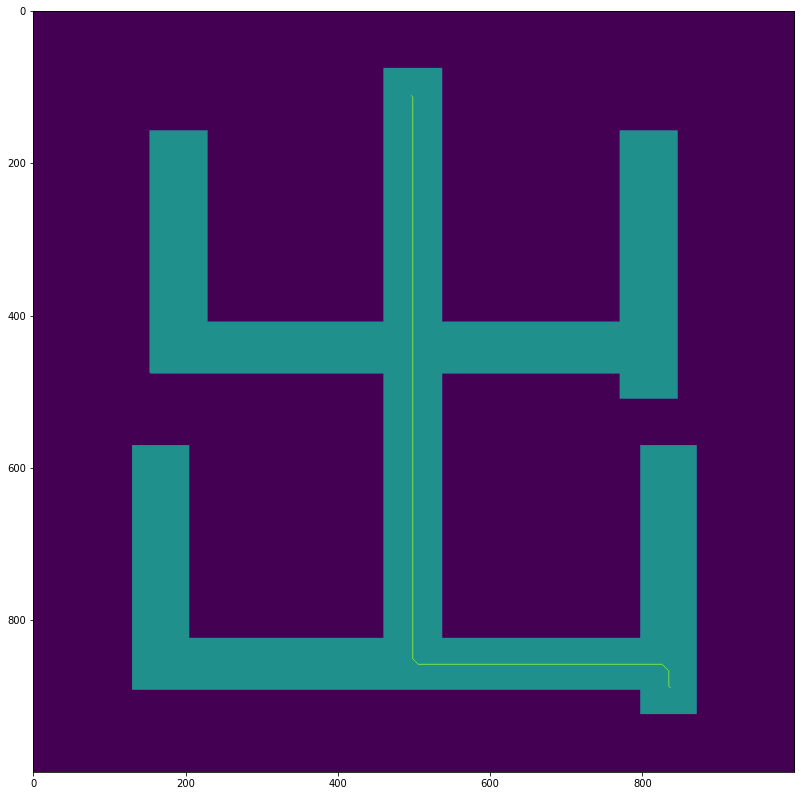

In [17]:
routeImg = charImg.copy()
for coord in route:
    routeImg[coord[0],coord[1]] = 2
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(routeImg)

[180 179] [278 523]


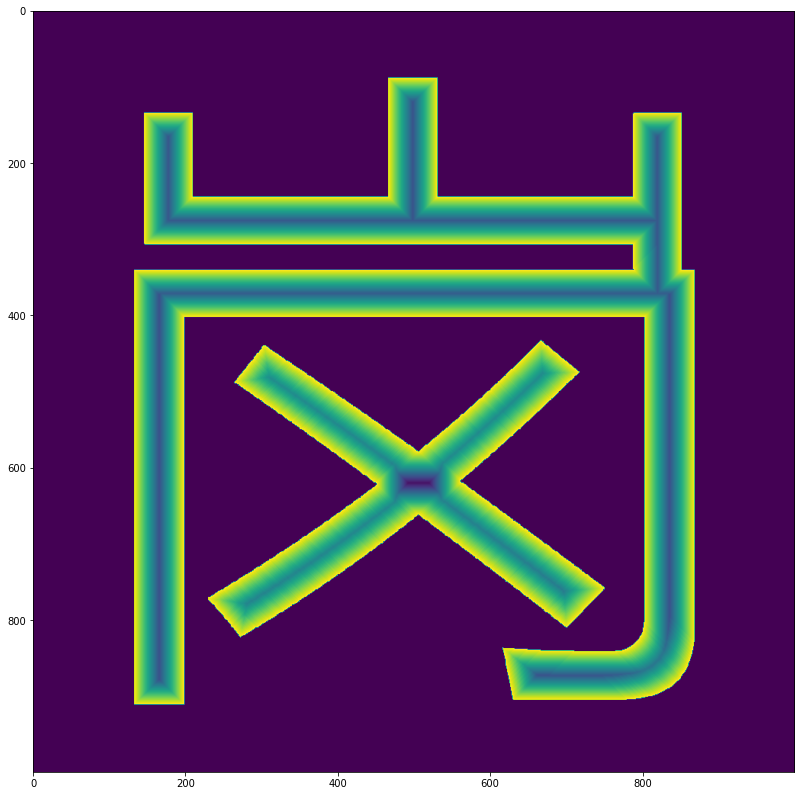

In [70]:
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(costImg)
ax.set_xlim([0,1000-1])
ax.set_ylim([0,1000-1])
print(startCoord, endCoord)
ax.plot(startCoord[1], startCoord[0], markersize=50, linestyle="none")
ax.plot(endCoord[1], endCoord[0], color="green", markersize=10)
ax.invert_yaxis()

In [9]:
import numpy as np
for num in np.linspace(-6, 6, 100):
    print(round(num,4), round(num % 5,4))

-6.0 4.0
-5.8788 4.1212
-5.7576 4.2424
-5.6364 4.3636
-5.5152 4.4848
-5.3939 4.6061
-5.2727 4.7273
-5.1515 4.8485
-5.0303 4.9697
-4.9091 0.0909
-4.7879 0.2121
-4.6667 0.3333
-4.5455 0.4545
-4.4242 0.5758
-4.303 0.697
-4.1818 0.8182
-4.0606 0.9394
-3.9394 1.0606
-3.8182 1.1818
-3.697 1.303
-3.5758 1.4242
-3.4545 1.5455
-3.3333 1.6667
-3.2121 1.7879
-3.0909 1.9091
-2.9697 2.0303
-2.8485 2.1515
-2.7273 2.2727
-2.6061 2.3939
-2.4848 2.5152
-2.3636 2.6364
-2.2424 2.7576
-2.1212 2.8788
-2.0 3.0
-1.8788 3.1212
-1.7576 3.2424
-1.6364 3.3636
-1.5152 3.4848
-1.3939 3.6061
-1.2727 3.7273
-1.1515 3.8485
-1.0303 3.9697
-0.9091 4.0909
-0.7879 4.2121
-0.6667 4.3333
-0.5455 4.4545
-0.4242 4.5758
-0.303 4.697
-0.1818 4.8182
-0.0606 4.9394
0.0606 0.0606
0.1818 0.1818
0.303 0.303
0.4242 0.4242
0.5455 0.5455
0.6667 0.6667
0.7879 0.7879
0.9091 0.9091
1.0303 1.0303
1.1515 1.1515
1.2727 1.2727
1.3939 1.3939
1.5152 1.5152
1.6364 1.6364
1.7576 1.7576
1.8788 1.8788
2.0 2.0
2.1212 2.1212
2.2424 2.2424
2.3636 2.3

In [152]:
coords = np.array(np.where(tempImg == 1)).transpose()
print(coords)

[[100 238]
 [101 234]
 [101 235]
 ...
 [910 384]
 [910 385]
 [910 386]]


In [174]:
x = np.linspace(230,245,10).astype(int)
y = np.linspace(100,105,10).astype(int)
print(x,y)
print( distImg[(y,x)] )
print( 3 np.pi )

[230 231 233 235 236 238 240 241 243 245] [100 100 101 101 102 102 103 103 104 105]
[20. 20. 21. 22. 23. 23. 22. 21. 20. 19.]
3.141592653589793


In [494]:
def getSideDiff(img, coord, radius, angle, samples=10):
    ySamples = np.linspace(coord[0], coord[0]+(radius*np.sin(angle + np.pi/2)),10).astype(int)
    xSamples = np.linspace(coord[1], coord[1]+(radius*np.cos(angle + np.pi/2)),10).astype(int)
    leftSum = np.sum(img[(ySamples,xSamples)])
    ySamples = np.linspace(coord[0], coord[0]+(radius*np.sin(angle - np.pi/2)),10).astype(int)
    xSamples = np.linspace(coord[1], coord[1]+(radius*np.cos(angle - np.pi/2)),10).astype(int)
    rightSum = np.sum(img[(ySamples,xSamples)])
    return ((leftSum) - (rightSum))/samples #e.g. if result is positive we increase angle

def getTotalElevation(img, coord, radius, angle, samples=10):
    ySamples = np.linspace(coord[0], coord[0]+(radius*np.sin(angle + np.pi/2)),10).astype(int)
    xSamples = np.linspace(coord[1], coord[1]+(radius*np.cos(angle + np.pi/2)),10).astype(int)
    leftSum = np.sum(img[(ySamples,xSamples)])
    ySamples = np.linspace(coord[0], coord[0]+(radius*np.sin(angle - np.pi/2)),10).astype(int)
    xSamples = np.linspace(coord[1], coord[1]+(radius*np.cos(angle - np.pi/2)),10).astype(int)
    rightSum = np.sum(img[(ySamples,xSamples)])
    return (leftSum + rightSum)/samples #e.g. if result is positive we increase angle

def runRobot(img, coord, radius, angle, samples=10, delta=1, epsilon=1):
    print(coord, radius, angle)
    coords = [coord.copy()]
    angles = [angle]
    if(epsilon*radius < 1):
        epsilon = 1.2/radius #adjust to make it large enough
    delta = epsilon*1/np.pi
    while(img[coord[0], coord[1]] > 5 and len(angles) < 10000):
        sideDiff = getSideDiff(img, coord, radius, angle)
        if(abs(sideDiff) > 2):
            angle += sideDiff*delta
        if(sideDiff*delta > np.pi):
            print("bruh?")
            break #angle change too large, 60 degree change
        coord[0] += epsilon*radius*np.sin(angle)
        coord[1] += epsilon*radius*np.cos(angle)
        angles.append(angle)
        coords.append(coord.copy())
    return coords, angles

[740 908] 29.0 1.6492929292929295
[740 908] 29.0 4.790885582882723


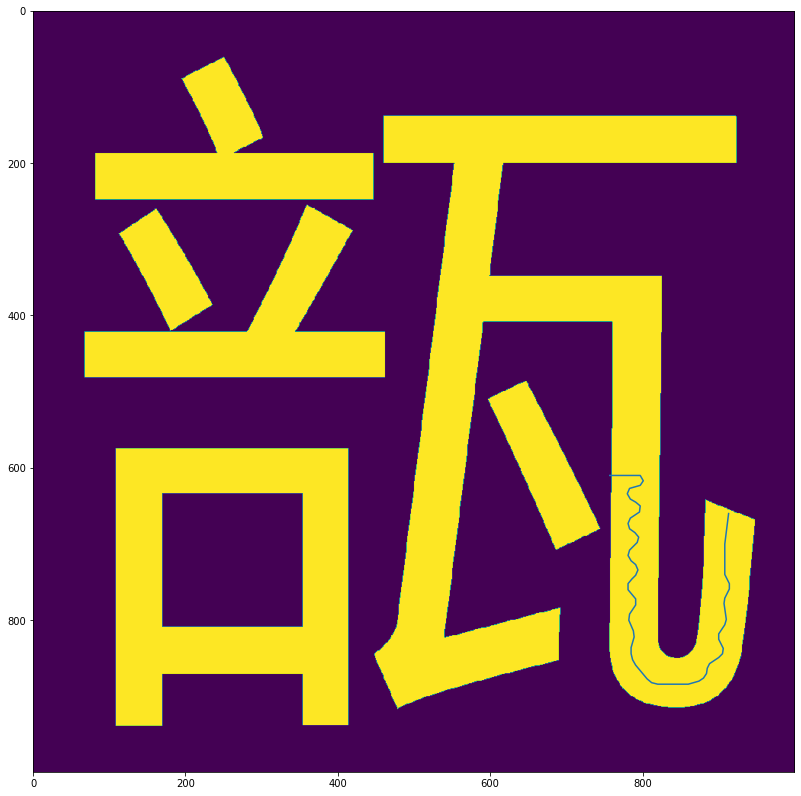

In [493]:
#start with the first possible coord we can use
coords = np.array(np.where(tempImg == 1)).transpose()
coord = coords[18075] #[y,x]

radiusLarge = distImg[coord[0], coord[1]]
radius = radiusLarge #half the size of the large radius

angles = np.linspace(0,3.14, 100)
results = abs(np.array([getTotalElevation(distImg, coord, radiusLarge, a) for a in angles]))
angle = angles[np.argmin(results)]

delta = .2
epsilon = .25
coords, angles = runRobot(distImg, coord.copy(), radius, angle, delta=delta, epsilon=epsilon)

angles.reverse()
coords.reverse()
coord = coords[-1].copy()
angle = angles[-1]+np.pi #go the other direction

coords2, angles2 = runRobot(distImg, coord.copy(), radius, angle, delta=delta, epsilon=epsilon)

coords = coords + coords2
angles = angles + angles2

coords = np.array(coords)
coords2 = np.array(coords2)
angles = np.array(angles)

fig, ax = plt.subplots(figsize=(14,14))
ax.set_xlim([0,1000-1])
ax.set_ylim([0,1000-1])
ax.plot(coords[:,1], coords[:,0])
ax.invert_yaxis()
ax.imshow(charImg)
#print(coords)

In [448]:
print(coords3)
print(coords2)
print(coords3+coords2)
coords3 = coords3+coords2
print(coords3)

[array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64)]
[array([659, 908], dtype=int64)]
[array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([659, 908], dtype=int64)]
[array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), array([740, 908], dtype=int64), arra

In [ ]:
#road path, 5 for main road, 1 for nearby dirt path, forbidden to go anywhere else.
#rules: we start with a frontier of just the root node
#when we add its 4 neighbors to the frontier
#for each neighbor if it's been explored, we replace if the route is cheaper, otherwise we destroy the current route and the branch
#because the route is more expensive
#also don't explore a neighbor if the route difference is trivial (e.g. moving right and then immedietly left)
#explored is a dictionary of coords with the key being the list of the route.


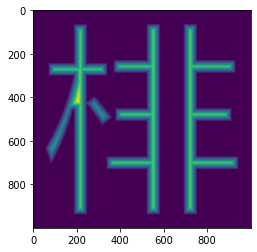

In [88]:
plt.imshow(distImg)

In [82]:
print(np.sum(diffImg >= 4))

232716


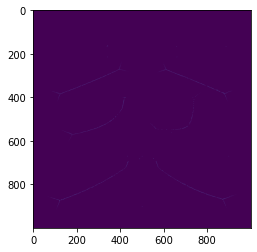

In [118]:
#now determine the psuedo global maximum (all neighbors, including diagonals), are equal or less than

tempImg = distImg.copy()
neighborImg = tempImg[1:-1, 1:-1]
#neighbor is a greater value
tempImg[0:-2,0:-2][neighborImg > tempImg[0:-2,0:-2]] = 0 #top left
tempImg[0:-2,1:-1][neighborImg > tempImg[0:-2,1:-1]] = 0 #top
tempImg[1:-1,0:-2][neighborImg > tempImg[1:-1,0:-2]] = 0 #left
tempImg[1:-1,2:][  neighborImg > tempImg[1:-1,2:]]   = 0 #top
tempImg[2:,1:-1][  neighborImg > tempImg[2:,1:-1]]   = 0 #bottom
tempImg[0:-2,0:-2][neighborImg > tempImg[0:-2,0:-2]] = 0 #top left
tempImg[0:-2,2:][  neighborImg > tempImg[0:-2,2:]]   = 0 #top right
tempImg[2:,0:-2][  neighborImg > tempImg[2:,0:-2]]   = 0 #bottom left
tempImg[2:,2:][    neighborImg > tempImg[2:,2:]]     = 0 #bottom right
distImg = tempImg.copy()

plt.imshow(distImg)

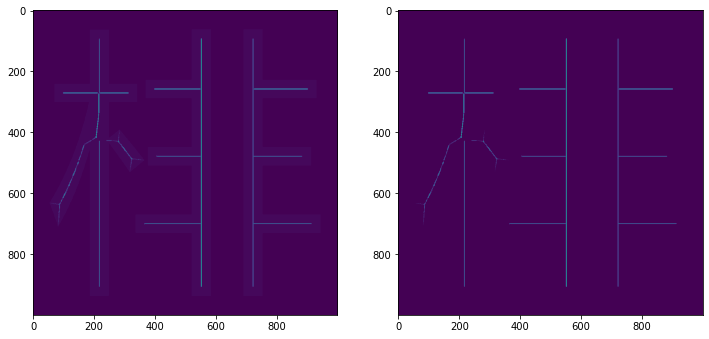

In [20]:
distList = []
countList = []
for num in range(1, int(np.max(distImg)+1)):
    distList.append(num)
    countList.append(np.sum(distImg == num))

lowestAccepted = distList[countList.index(max(countList))] * 0
#distList.reverse()
#countList.reverse()
#
#print(countList)
#
#pivot = 0 #inclusive
#usedPixels = countList[pivot]
#neededPercent = .9 #we need to use 95
#totalCount = np.sum(distImg > 0) #nonzero pixel count
#while(usedPixels <= totalCount*neededPercent):
#    pivot += 1
#    usedPixels += countList[pivot]
#    
#print(pivot)
tempImg = np.zeros(np.shape(distImg))
#tempImg[distImg >= distList[pivot]] = distImg[distImg >= distList[pivot]]
tempImg[distImg >= lowestAccepted] = distImg[distImg >= lowestAccepted]

fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(charImg + tempImg)
ax[1].imshow(tempImg)
plt.imsave("testImage.png", distImg)
plt.imsave("testImage2.png", tempImg)

[20, 33, 24, 28, 32, 21, 28, 28, 30, 26, 28, 28, 25, 26, 29, 20, 21, 34, 26, 106, 21, 27, 152, 313, 233, 223, 187, 1014, 1060, 1581, 584, 1093, 6, 5, 7, 1] 7120


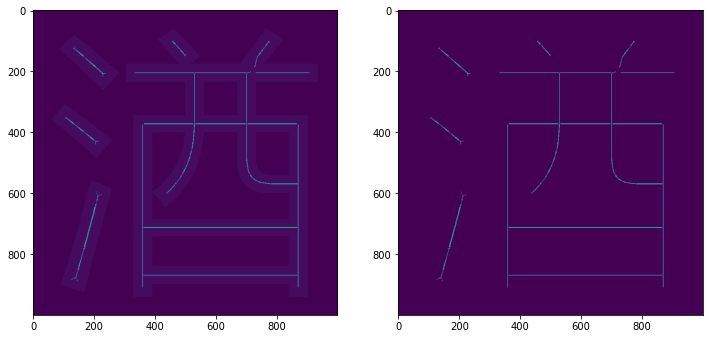

In [10]:
totalCount = np.sum(distImg > 0)

distList = []
countList = []

for num in range(1, int(np.max(distImg)+1)):
    distList.append(num)
    countList.append(np.sum(distImg == num))
    
print(countList, totalCount)

usedPixels = 0
neededPercent = .90 #we need to use 95
tempImg = np.zeros(np.shape(distImg))

while(usedPixels <= totalCount*neededPercent):
    maxInd = countList.index(max(countList))
    usedPixels += countList[maxInd]
    tempImg[distImg == distList[maxInd]] = distList[maxInd]
    countList[maxInd] = 0 #zero out this coord

fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(charImg + tempImg)
ax[1].imshow(tempImg)
plt.imsave("testImage.png", distImg)
plt.imsave("testImage2.png", tempImg)

## Part two: Get a road scoring image
Outside the "road" is zero
Inside the road is a max of 5, but getting close to the edge approaches zero
Corner doesn't count as touching

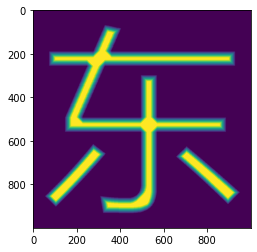

In [40]:
maxRoadScore = 30

roadImg = charImg.copy()
roadImg[roadScore >= 1] = maxRoadScore

for currOuter in range(0, maxRoadScore):
    #if pixel borders (diagonal possibly counted), note these next lines could cause border effects if a "road" is touching the border
    tempImg = roadImg.copy()
    borderMask  = tempImg[1:-1, 1:-1] == currOuter
    #neighbor is on border and is not already set
    #tempImg[0:-2,0:-2][borderMask & (tempImg[0:-2,0:-2] == maxRoadScore)] = currOuter+1 #top left
    tempImg[0:-2,1:-1][borderMask & (tempImg[0:-2,1:-1] == maxRoadScore)] = currOuter+1 #top
    #tempImg[0:-2,2:][  borderMask & (tempImg[0:-2,2:] == maxRoadScore)]   = currOuter+1 #top right
    tempImg[1:-1,0:-2][borderMask & (tempImg[1:-1,0:-2] == maxRoadScore)] = currOuter+1 #left
    tempImg[1:-1,2:][  borderMask & (tempImg[1:-1,2:] == maxRoadScore)]   = currOuter+1 #top
    #tempImg[2:,0:-2][  borderMask & (tempImg[2:,0:-2] == maxRoadScore)]   = currOuter+1 #bottom left
    tempImg[2:,1:-1][  borderMask & (tempImg[2:,1:-1] == maxRoadScore)]   = currOuter+1 #bottom
    #tempImg[2:,2:][    borderMask & (tempImg[2:,2:] == maxRoadScore)]     = currOuter+1 #bottom right
    
    roadImg = tempImg.copy()
    
plt.imshow(roadImg)